In [52]:
# To fetch data
from pandas_datareader import data as pdr
!pip install yfinance
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')


In [53]:
#import libraries
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

[*********************100%***********************]  1 of 1 completed


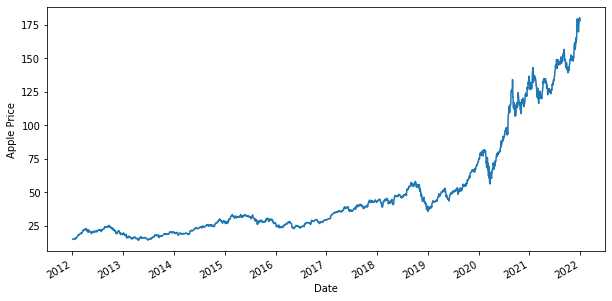

In [54]:
df = pdr.get_data_yahoo('AAPL', start="2012-01-01", end="2021-12-31")         
df= df.dropna()
df.Close.plot(figsize=(10,5))
plt.ylabel("Apple Price")
plt.show()

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2516.0,4.896522e+01,3.861666e+01,1.385607e+01,2.366750e+01,3.234375e+01,5.411625e+01,1.811200e+02
High,2516.0,4.947798e+01,3.908127e+01,1.427143e+01,2.390571e+01,3.264250e+01,5.481500e+01,1.821300e+02
Low,2516.0,4.846502e+01,3.817468e+01,1.375357e+01,2.341813e+01,3.208125e+01,5.333250e+01,1.785300e+02
Close,2516.0,4.899329e+01,3.865549e+01,1.394750e+01,2.365902e+01,3.235750e+01,5.390563e+01,1.803300e+02
Adj Close,2516.0,4.717291e+01,3.924251e+01,1.211916e+01,2.122447e+01,2.953966e+01,5.224932e+01,1.801005e+02
Volume,2516.0,2.151439e+08,1.758699e+08,4.100000e+07,1.032077e+08,1.513560e+08,2.652520e+08,1.506120e+09


In [56]:
# Number of features
print('- Number of features: %d' % df.shape[1])
for c in df.columns:
    print('  - %s' % c)

- Number of features: 6
  - Open
  - High
  - Low
  - Close
  - Adj Close
  - Volume


In [57]:
#data types
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [58]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575915,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643497,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783867,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917507,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897018,394024400
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.055695,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300


#### Split Train and Test

In [59]:
target_col = "Close"
X = df[[col for col in df.columns if col != target_col]]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=False)
#'y' is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict.

In [60]:
train_size = int(len(X) * 0.8)
train, test = X[0:train_size], X[train_size:len(X)]
print('Total Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Total Observations: 2516
Training Observations: 2012
Testing Observations: 504


In [61]:
# Train data set
X_train = X[:train_size]
y_train = y[:train_size] 

# Test data set
X_test = X[train_size:]
y_test = y[train_size:]

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range =(0,1))
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

###### Supervised Model - Logistics Regression

In [63]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)

LogisticRegression()

In [64]:
bag1 = BaggingClassifier(
    base_estimator = logreg,
    n_estimators = 100,
    max_samples = 0.8,
    max_features = 0.8)
bag1.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.8,
                  max_samples=0.8, n_estimators=100)

In [65]:
logreg.score(X_test, y_test)

0.5376984126984127

In [66]:
bag1.score(X_test, y_test)

0.5396825396825397

In [67]:
y_pred_class = logreg.predict(X_train)
print('accuracy = %.4f' %
      accuracy_score(y_train, y_pred_class))

accuracy = 0.5204


In [68]:
y_pred_class = logreg.predict(X_test)
print('accuracy = %.4f' %
      accuracy_score(y_test, y_pred_class))

accuracy = 0.5377


###### Supervised Model - LInear SVC

In [69]:
svc = SVC(C=10) #best C value derived from another notebook

In [70]:
svc.fit(X_train, y_train)

SVC(C=10)

In [71]:
bag2 = BaggingClassifier(
    base_estimator = svc,
    n_estimators = 100,
    max_samples = 0.8,
    max_features = 0.8)
bag2.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=10), max_features=0.8, max_samples=0.8,
                  n_estimators=100)

In [72]:
svc.score(X_test, y_test)

0.503968253968254

In [73]:
bag2.score(X_test, y_test)

0.5158730158730159

###### Supervised Model - Gaussian NB

In [74]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [75]:
bag3 = BaggingClassifier(
    base_estimator = nb,
    n_estimators = 100,
    max_samples = 0.8,
    max_features = 0.8)
bag3.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), max_features=0.8,
                  max_samples=0.8, n_estimators=100)

In [76]:
nb.score(X_test, y_test)

0.5

In [77]:
bag3.score(X_test, y_test)

0.5059523809523809

###### Unsupervised - Decision Tree

In [78]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth =1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [79]:
bag = BaggingClassifier(
    base_estimator = tree,
    n_estimators = 100,
    max_samples = 0.8,
    max_features = 0.8)

In [80]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=1),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

In [81]:
bag.score(X_test, y_test)

0.5158730158730159

In [82]:
tree.score(X_test, y_test)

0.5357142857142857

In [83]:
y_pred_class = tree.predict(X_train)
print('accuracy = %.4f' %
      accuracy_score(y_train, y_pred_class))

accuracy = 0.5244


In [84]:
y_pred_class = tree.predict(X_test)
print('accuracy = %.4f' %
      accuracy_score(y_test, y_pred_class))

accuracy = 0.5357


In [85]:
boosting = AdaBoostClassifier(base_estimator = tree, n_estimators = 20)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

0.5178571428571429

In [86]:
boosting = AdaBoostClassifier(base_estimator = logreg, n_estimators = 20)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

0.5357142857142857

In [87]:
boosting = AdaBoostClassifier(base_estimator = nb, n_estimators = 20)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

0.5376984126984127

In [88]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada.score(X_test, y_test)

0.4861111111111111

In [89]:
!pip install xgboost
from xgboost import XGBClassifier

In [90]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

[12:57:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5238095238095238

In [102]:
boosting = XGBClassifier(base_estimator = logreg, n_estimators = 20)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

[13:01:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:01:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4781456953642384

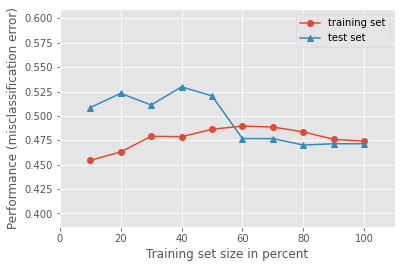

In [91]:
#plot learning curves - logreg
np.random.seed(2534)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bag1, print_model = False, style = 'ggplot')
plt.show()

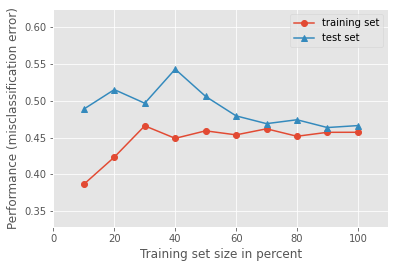

In [92]:
# plot learning curves - tree
np.random.seed(2534)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bag, print_model = False, style = 'ggplot')
plt.show()

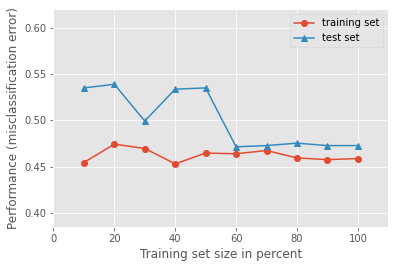

In [93]:
# plot learning curves - svc
np.random.seed(2534)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bag2, print_model = False, style = 'ggplot')
plt.show()

In [94]:
# Ensemble Size - tree
num_est = np.linspace(1, 100, 20, dtype = np.int8)

np.random.seed(2534)

bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(
        base_estimator = tree,
        n_estimators = n_est,
        max_samples = 0.8,
        max_features = 0.8)
    scores = cross_val_score(bg_clf, X, y, cv = 3, scoring = 'accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

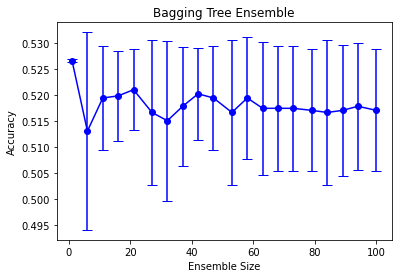

In [95]:
plt.figure()
(_, caps, _) = plt.errorbar(
    num_est,
    bg_clf_cv_mean,
    yerr = bg_clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                

plt.title('Bagging Tree Ensemble')
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.show()

In [96]:
clf1 = SVC(C=10)
clf2 = RandomForestClassifier(n_estimators = 100, random_state = 42)
#clf2 = RandomForestClassifier(n_estimators = 10)
clf3 = GaussianNB()
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
sclf = StackingClassifier(
    classifiers = [clf1, clf2, clf3],
    meta_classifier = lr)

In [97]:
sclf.fit(X_train, y_train)

StackingClassifier(classifiers=[SVC(C=10),
                                RandomForestClassifier(random_state=42),
                                GaussianNB()],
                   meta_classifier=LogisticRegression())

In [98]:
sclf.score(X_test, y_test)

0.5059602649006623

In [99]:
y_test_pred = sclf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(roc_auc_score(y_test, y_test_pred))

0.5059602649006623
0.5060931823941877


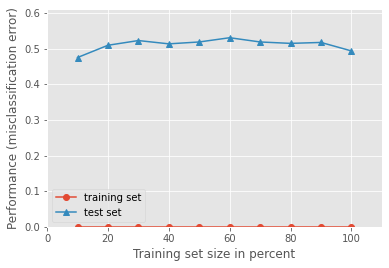

In [100]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model = False, style = 'ggplot')
plt.show()

Accuracy: 0.52 (+/- 0.01) [SVC]


ValueError: Filler values must be provided when X has more than 2 training features.

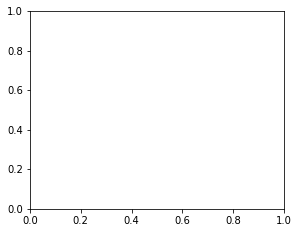

In [108]:
import numpy as np
label = ['SVC', 'Random Forest', 'Naïve Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_1, y_1, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_1, y = y_1, clf = clf)
    plt.title(label)

plt.show()

In [107]:
X_1 = np.array(X)
y_1 = np.array(y)